Clique aqui para ter acesso ao [mini-paper](https://www.overleaf.com/7983964188fsswxxqddwgh).



# Atividade: 

## Implementar os seguintes atributos em uma imagem:

- Média
- Variância
- Skewness
- Kurtosis
- Energia
- Entropia

Utilizar a base de imagens do trabalho anterior
- Calcular os atributos de primeira ordem para cada imagem, e criar uma matriz
- Plotar os atributos dois a dois (scatter plot)
- A entrega será:
    - Notebook com os códigos;
    - Short paper de até 4 páginas com:
        - Introdução: apresentar o problema/base escolhida;
        - Metodologia: explicar os atributos e como são calculados;
        - Resultados: resultado da classificação e scatter plots dos atributos;
        - Extra: plotar os atributos utilizando um algoritmo de redução de dimensionalidade, ex: PCA, t-SNE;
        - Conclusão.

Implemente as seguintes transformações de intensidade:
* Alargamento de contraste: s=T(r)=(1/(1+((k/r)E^))).
* Negativo: s=L−1−r.
* Logarítmico:s=clog(1+r).
* Potência: s=(cr)^y.

a. Cada transformação deverá ser implementada utilizando pelo menos 4 configurações diferentes de parâmetros (exceto o negativo). 

b. Utilize as funções de transformação de intensidade como pré-processamento do trabalho anterior, reporte os resultados de classificação obtidos com as diferentes funções.

    i. Adicione os resultados no relatório do trabalho anterior;

    ii. Na seção de metodologia adicione e explique as funções de alargamento de contraste;

    iii. Na seção de resultados adicione tabelas com os resultados obtidos pelas funções e explique as diferenças obtidas em cada transformação.

    iv. Adicione imagens que justifiquem suas explicações.

- Entrega e apresentação: 10/01/2022

In [1]:
from skimage.io import imread
from skimage.exposure import histogram
from skimage.color import rgb2gray
import numpy as np
from scipy.stats import entropy, skew, kurtosis
from glob import glob

import os

In [2]:
def energy(x):
    return np.sum(np.power(x, 2))

In [3]:
# def kurtosis(x):
#     media = np.mean(x)
#     var = np.var(x)
#     kur = np.sum((x - media) ** 4) / (len(x) * var ** 2)
#     return kur

In [4]:
# def skew(x):
#     media = np.mean(x)
#     var = np.var(x)
#     sk = np.sum((x - media) ** 3) / (len(x) * var ** (3/2))
#     return sk

In [5]:
def descritor_histograma(imagem):
    frequencias, _ = np.histogram(imagem, bins=256, density=True)

    media = np.mean(frequencias)

    var = np.var(frequencias)

    sk = skew(frequencias)

    kur = kurtosis(frequencias)

    ener = energy(frequencias)
    
    entr = entropy(frequencias)

    return [media,var,sk,kur,ener,entr]

In [6]:
def load_data(DATABASE_PATH, classes, qtd_imagens=1000):
    x = []
    y = []
    for i, classe in enumerate(classes):
        IMAGES_PATH = classe + '/images'

        IMAGES_NAME = glob(os.path.join(DATABASE_PATH, IMAGES_PATH, '*.png'))

        for IMAGE_NAME in IMAGES_NAME[0:qtd_imagens]:
            img = imread(IMAGE_NAME, as_gray=True)

            instancia = descritor_histograma(img)
            y.append(i)
            
            x.append(instancia)

    return x,y

In [7]:
DATABASE_PATH = 'COVID-19_Radiography_Dataset'

classes = ['Normal', 'COVID', 'Viral Pneumonia']

x, y = load_data(DATABASE_PATH, classes, 1000)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score as acc

def classification(X,y):

    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """
    
    # separar conjuntos de treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, shuffle=True, random_state=42)
    # criar instancia do classificador
    clf = mlp()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = acc(y_test,pred)
    
    return acuracia

In [45]:
acc = classification(x,y)

In [46]:
print(acc)

0.5283333333333333


In [35]:
%pip install matplotlib
from skimage.io import imread,imsave
import matplotlib.pyplot as plt
from PIL import Image
import math

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\euric\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


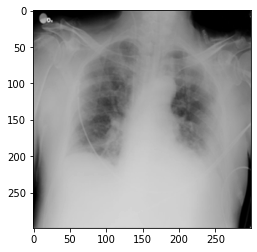

In [36]:
#imagem = imread('COVID-19_Radiography_Dataset\COVID\images\COVID-1.png')
img = imread('COVID-19_Radiography_Dataset\COVID\images\COVID-1.png')
plt.imshow(img, cmap='gray')

In [37]:
def calculo_de_contraste(pixel, k, E):
    if pixel == 0:
        return 0
    else:
        return 1/(1 + (k/pixel)**E)

In [ ]:
def alargamento_de_contraste(path, img_filename, img):
    values_k = [25, 50, 75, 100]
    E = 2
    image_array = np.array(img)
    for k in values_k:
        if not os.path.exists('{}k={}-E={}'.format(path, k, E)):
            os.makedirs('{}k={}-E={}'.format(path, k, E))
        image_copy = image_array.copy()
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                novo_pixel = calculo_de_contraste(image_copy[i][j], k, E)
                image_copy[i][j] = int(novo_pixel * 255)
                
        image = Image.fromarray(image_copy)
        image.save("{}k={}-E={}/{}.png".format(path, k, E, img_filename))

In [ ]:
def calculo_de_negativo(pixel):
    return 255-pixel

In [ ]:
def negativo(path, img_filename, img):
    image_array = np.array(img)
    image_copy = image_array.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            novo_pixel = calculo_de_negativo(image_copy[i][j])
            image_copy[i][j] = int(novo_pixel * 255)
                
        image = Image.fromarray(image_copy)
        image.save("{}{}.png".format(path, img_filename))

In [ ]:
def calculo_logaritmico(pixel, c):
    return c*math.log(1 + pixel)

In [ ]:
def transformacao_logaritmica(path, img_filename, img):
    values_c = [1, 5, 15, 30]
    image_array = np.array(img)
    for c in values_c:
        if not os.path.exists('{}c={}'.format(path, c)):
            os.makedirs('{}c={}'.format(path, c))
        image_copy = image_array.copy()
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                novo_pixel = calculo_logaritmico(image_copy[i][j], c)
                image_copy[i][j] = int(novo_pixel * 255)
                
        image = Image.fromarray(image_copy)
        image.save("{}c={}/{}.png".format(path, c, img_filename))

In [ ]:
def calculo_potencia(pixel, c, y):
    return c* (pixel/256) ** y

In [ ]:
def transformacao_potencia(path, img_filename, img):
    c = 1
    values_y = [0.04, 0.4, 2.5, 5]
    image_array = np.array(img)
    for y in values_y:
        if not os.path.exists('{}c={}-y={}'.format(path, c, y)):
            os.makedirs('{}c={}-y={}'.format(path, c, y))
        image_copy = image_array.copy()
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                novo_pixel = calculo_potencia(image_copy[i][j], c, y)
                image_copy[i][j] = int(novo_pixel * 255)
                
        image = Image.fromarray(image_copy)
        image.save("{}c={}-y={}/{}.png".format(path, c, y, img_filename))

In [ ]:
#test = 'abashala\\sadadad.png'
#print(nome_arquivo(test))

In [ ]:
def nome_arquivo(image_path):
    #print(image_path)
    for i in range(len(image_path) - 1, -1, -1):
        if image_path[i] == '\\':
            break
    image_name = image_path[i + 1: len(image_path) - 4]
    return image_name

In [ ]:
def files_exists_verify(DATABASE_PATH, classe):
    if not os.path.exists(DATABASE_PATH+'/'+ classe+'/alargamento_de_contraste'):
        os.makedirs(DATABASE_PATH+'/'+ classe+'/alargamento_de_contraste')
    if not os.path.exists(DATABASE_PATH+'/'+ classe+'/negativo'):
        os.makedirs(DATABASE_PATH+'/'+ classe+'/negativo')
    if not os.path.exists(DATABASE_PATH+'/'+ classe+'/transformacao_logaritmica'):
        os.makedirs(DATABASE_PATH+'/'+ classe+'/transformacao_logaritmica')
    if not os.path.exists(DATABASE_PATH+'/'+ classe+'/transformacao_potencia'):
        os.makedirs(DATABASE_PATH+'/'+ classe+'/transformacao_potencia')

In [ ]:
def load_data_copiado_XD(DATABASE_PATH, classes, qtd_imagens=1000):
    for i, classe in enumerate(classes):
        IMAGES_PATH = classe + '/images'
        files_exists_verify(DATABASE_PATH, classe)
        IMAGES_NAME = glob(os.path.join(DATABASE_PATH, IMAGES_PATH, '*.png'))
        for IMAGE_NAME in IMAGES_NAME[0:qtd_imagens]:
            img = imread(IMAGE_NAME, as_gray=True)
            filename = nome_arquivo(IMAGE_NAME)
            
            alargamento_de_contraste(DATABASE_PATH+'/'+ classe+'/alargamento_de_contraste/', filename, img)
            negativo(DATABASE_PATH+'/'+ classe+'/negativo/', filename, img)
            transformacao_logaritmica(DATABASE_PATH+'/'+ classe+'/transformacao_logaritmica/', filename, img)
            transformacao_potencia(DATABASE_PATH+'/'+ classe+'/transformacao_potencia/', filename, img)
            

In [ ]:
DATABASE_PATH = 'COVID-19_Radiography_Dataset'

classes = ['Normal', 'COVID', 'Viral Pneumonia']

load_data_copiado_XD(DATABASE_PATH, classes, 2)

In [ ]:
alargamento_de_contraste(img)

In [ ]:
negativo(img)

In [ ]:
transformacao_logaritmica(img)

In [ ]:
transformacao_potencia(img)

### Plotar os atributos dois a dois (scatter plot)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importar as bibliotecas utilziadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# carregar o data set
dataset = pd.read_csv('/content/drive/MyDrive/1.Projetos/3.Topicos_em_Visão_computacional/1_Trabalho/dataset_covid19.csv')

In [ ]:
dataset.head(10)

In [ ]:
type(dataset)

In [ ]:
ax2 = df.plot.scatter(

In [ ]:
def plot_scatter(dataset: pd.core.frame.DataFrame, height: str, weight: str, classe: str):
  dataset.plot.scatter(x='length',
                       y='width',
                       c='species',
                       colormap= ['blue','green','yellow'] ))

In [ ]:
dataset.plot(kind='scatter', x='Média', y='Variância', alpha=1, c=dataset['Doença'], figsize=(10,7), cmap=plt.get_cmap('jet'))

plt.show()

In [ ]:
plot_scatter(dataset, 'Variância', 'Variância'	, 'Doença')